In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

RFM анализ - метод сегментации клиентов на основе данных об их покупках.

Он учитывает 3 признака: recency (давность покупки), frequency (частота покупок) и monetary (сумма трат клиента)

In [17]:
df = pd.read_csv('apteka.csv', sep=';')

In [18]:
df.head(30)

,datetime,shop,card,bonus_earned,bonus_spent,summ,summ_with_disc,doc_id
0,2021-07-13 12:56:09.000,Аптека 2,2000200195023,51,0,3400,3400,15#2002741#65938#2_29
1,2021-07-30 10:42:00.000,Аптека 2,2000200193494,57,0,747,747,15#2002972#65955#2_5
2,2021-10-11 12:55:23.000,Аптека 2,2000200199106,92,253,3077,3077,15#2004060#66028#2_29
3,2021-10-14 14:48:56.000,Аптека 2,2000200168768,1,0,54,54,15#2004107#66031#2_57
4,2021-10-20 11:09:39.000,Аптека 2,2000200226314,101,0,1733,1733,15#2004192#66037#2_16
5,2021-10-29 13:55:20.000,Аптека 2,2000200192060,8,0,285,285,15#2004318#66046#2_40
6,2021-11-12 14:10:11.000,Аптека 2,2000200193241,17,0,588,588,15#2004481#66060#2_35
7,2021-11-15 12:21:15.000,Аптека 2,2000200183938,33,0,825,825,15#2004513#66063#2_24
8,2021-11-30 18:01:09.000,Аптека 2,2000200165811,26,0,886,886,15#2004712#66078#2_63
9,2021-12-03 15:51:20.000,Аптека 2,2000200186984,6,0,172,172,15#2004764#66081#2_78


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38486 entries, 0 to 38485
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   datetime        38486 non-null  object
 1   shop            38486 non-null  object
 2   card            38486 non-null  object
 3   bonus_earned    38486 non-null  int64 
 4   bonus_spent     38486 non-null  int64 
 5   summ            38486 non-null  int64 
 6   summ_with_disc  38486 non-null  int64 
 7   doc_id          38486 non-null  object
dtypes: int64(4), object(4)
memory usage: 2.3+ MB


In [20]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [21]:
# как видно из данных в таблице, в некоторых записях, вместо кода карты указано случайное значение
# эти данные не интересны для анализа, так как невозможно определить, к какому клиенту они относятся
# поэтому избавимся от них
df = df[df['card'].str.startswith('2000')]

In [22]:
df = df.sort_values(['card', 'datetime'])
df

,datetime,shop,card,bonus_earned,bonus_spent,summ,summ_with_disc,doc_id
641,2021-07-19 09:37:20,Аптека 2,2000200150015,0,1,21,21,15#2002822#65944#2_6
16455,2021-12-07 20:25:21,Аптека 2,2000200150022,30,0,1351,1351,15#2004825#66085#2_140
8751,2021-10-05 16:31:25,Аптека 2,2000200150053,15,0,649,649,15#2003981#66022#2_65
28718,2022-03-17 20:50:23,Аптека 7,2000200150053,1,0,64,64,15#11002624#66185#11_177
834,2021-07-21 11:10:25,Аптека 2,2000200150091,22,0,746,746,15#2002857#65946#2_4
...,...,...,...,...,...,...,...,...
38150,2022-06-07 17:08:45,Аптека 2,2000200259015,69,0,664,664,15#2003527#66267#2_73
38199,2022-06-07 19:19:12,Аптека 2,2000200259381,53,0,245,245,15#2003527#66267#2_109
38147,2022-06-07 19:37:59,Аптека 2,2000200259398,65,0,395,395,15#2003527#66267#2_113
38226,2022-06-08 09:46:52,Аптека 2,2000200259404,73,0,784,784,15#2003546#66268#2_7


In [23]:
# создадим новый датафрейм, в котором соберем необходимые для анализа данные
# purchase_sum - общая сумма покупок клиента
# purchase_amount - количество транзакций клиента
# last_purchase - дата последней покупки
df_rfm = df.groupby('card').agg(
    purchase_sum = ('summ_with_disc', 'sum'),
    purchase_amount = ('summ_with_disc', 'count'),
    last_purchase = ('datetime', 'last'),
).reset_index()

In [24]:
# для анализа необходимо знать не просто дату последней покупки,
# а сколько дней назад (считая от даты проведения анализа) она была совершена
current_date = max(df['datetime'])
df_rfm['days_since_last_purchase'] = (current_date - df_rfm['last_purchase']).dt.days

In [25]:
df_rfm

,card,purchase_sum,purchase_amount,last_purchase,days_since_last_purchase
0,2000200150015,21,1,2021-07-19 09:37:20,325
1,2000200150022,1351,1,2021-12-07 20:25:21,184
2,2000200150053,713,2,2022-03-17 20:50:23,84
3,2000200150091,3549,5,2022-06-05 11:49:47,4
4,2000200150107,1735,3,2022-06-02 17:54:19,7
...,...,...,...,...,...
5921,2000200259015,664,1,2022-06-07 17:08:45,2
5922,2000200259381,245,1,2022-06-07 19:19:12,2
5923,2000200259398,395,1,2022-06-07 19:37:59,2
5924,2000200259404,784,1,2022-06-08 09:46:52,1


In [40]:
# изучим полученные данные подробнее
quantiles = [round(x, 1) for x in np.arange(0.1, 1.1, 0.1)]
df_rfm['purchase_sum'].quantile(quantiles)

0.1       405.5
0.2       620.0
0.3       844.0
0.4      1103.0
0.5      1470.5
0.6      2008.0
0.7      2731.0
0.8      4078.0
0.9      6906.5
1.0    162687.0
Name: purchase_sum, dtype: float64

Text(0.5, 1.0, 'Столбчатая диаграмма суммы покупок по квантилям')

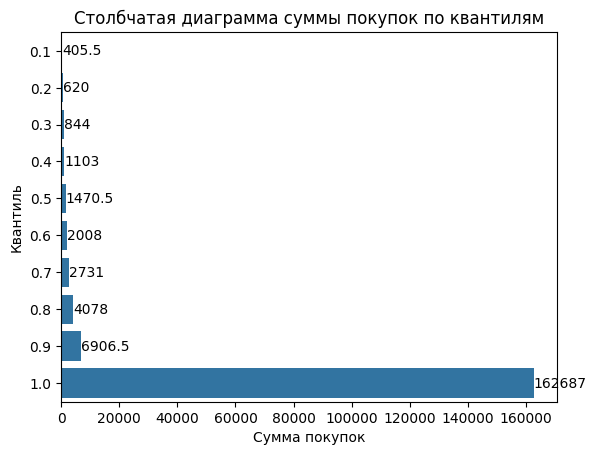

In [50]:
# как видим, в данных о сумме покупок есть выбросы
ax = sns.barplot(x=df_rfm['purchase_sum'].quantile(quantiles), y=quantiles, orient='h')
ax.bar_label(ax.containers[-1]);
ax.set_xlabel('Сумма покупок')
ax.set_ylabel('Квантиль')
ax.set_title('Столбчатая диаграмма суммы покупок по квантилям')

Text(0.5, 1.0, 'Столбчатая диаграмма количества покупок по квантилям')

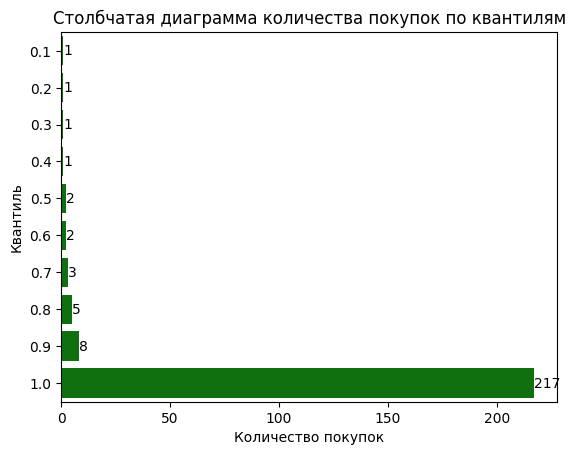

In [57]:
ax = sns.barplot(x=df_rfm['purchase_amount'].quantile(quantiles), y=quantiles, orient='h', color='green')
ax.bar_label(ax.containers[-1]);
ax.set_xlabel('Количество покупок')
ax.set_ylabel('Квантиль')
ax.set_title('Столбчатая диаграмма количества покупок по квантилям')

Text(0.5, 1.0, 'Столбчатая диаграмма количества дней с последней покупки по квантилям')

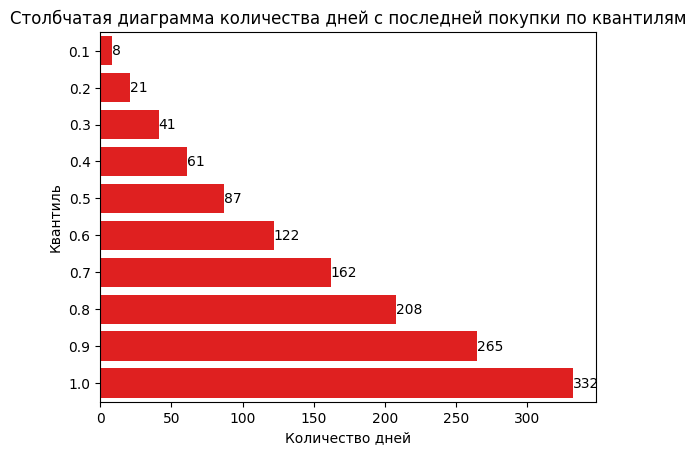

In [56]:
ax = sns.barplot(x=df_rfm['days_since_last_purchase'].quantile(quantiles), y=quantiles, orient='h', color='red')
ax.bar_label(ax.containers[-1]);
ax.set_xlabel('Количество дней')
ax.set_ylabel('Квантиль')
ax.set_title('Столбчатая диаграмма количества дней с последней покупки по квантилям')

Как видно из полученных графиков, в данных о сумме покупок и количестве покупок наблюдаются выбросы

In [87]:
quantile_values = [0.33, 0.66]

In [88]:
# создадим функцию, которая будет в зависимости от данных присваивать
# каждой записи рейтинг по каждому из трех критериев
# val - значение
# var - критерий ()'R', 'F', 'M')
# perc - значения перцентилей (33% и 66%)
def set_rfm_score(val, var, perc):
  if val < perc.iloc[0]:
    return 3 if var != 'R' else 1
  elif val < perc.iloc[1]:
    return 2
  else:
    return 1 if var != 'R' else 3

In [92]:
recency_quantiles = df_rfm['days_since_last_purchase'].quantile(quantile_values)
df_rfm['R'] = df_rfm['days_since_last_purchase'].apply(set_rfm_score, args=('R', recency_quantiles))

frequency_quantiles = df_rfm['purchase_amount'].quantile(quantile_values)
df_rfm['F'] = df_rfm['purchase_amount'].apply(set_rfm_score, args=('F', frequency_quantiles))

monetary_quantiles = df_rfm['purchase_sum'].quantile(quantile_values)
df_rfm['M'] = df_rfm['purchase_sum'].apply(set_rfm_score, args=('M', monetary_quantiles))

In [93]:
df_rfm

,card,purchase_sum,purchase_amount,last_purchase,days_since_last_purchase,R,F,M,RFM
0,2000200150015,21,1,2021-07-19 09:37:20,325,3,2,3,323
1,2000200150022,1351,1,2021-12-07 20:25:21,184,3,2,2,321
2,2000200150053,713,2,2022-03-17 20:50:23,84,2,2,3,221
3,2000200150091,3549,5,2022-06-05 11:49:47,4,1,1,1,111
4,2000200150107,1735,3,2022-06-02 17:54:19,7,1,1,2,111
...,...,...,...,...,...,...,...,...,...
5921,2000200259015,664,1,2022-06-07 17:08:45,2,1,2,3,121
5922,2000200259381,245,1,2022-06-07 19:19:12,2,1,2,3,123
5923,2000200259398,395,1,2022-06-07 19:37:59,2,1,2,3,123
5924,2000200259404,784,1,2022-06-08 09:46:52,1,1,2,3,121


In [94]:
# добавим еще один столбец, где соединим все значения критериев в одну строку
df_rfm['RFM'] = df_rfm.apply(lambda row: f"{row['R']}{row['F']}{row['M']}", axis=1)
# найдем все записи с одинаковыми значениями критериев и посчитаем их количество
df_final = df_rfm.groupby('RFM')['RFM'].agg({'count'}).reset_index()
df_final

,RFM,count
0,111,862
1,112,203
2,113,32
3,121,118
4,122,340
5,123,395
6,211,488
7,212,223
8,213,34
9,221,176


In [95]:
fig = px.treemap(df_final, path=['RFM'], values='count',
                 color='count', color_continuous_scale='sunset',
                 hover_data=['RFM'],
                 title='Диаграмма RFM',
                 width=1000, height=800)

fig.update_traces(textinfo="label+value",
                  hovertemplate='<b>%{label}</b><br>Количество: %{value}<extra></extra>')

fig.update_layout(margin=dict(t=50, l=0, r=0, b=0))

fig.show()

Выводы:

Вторая по численности группа - 111, то есть наилучшая категория клиентов, необходимо сохранить, для этого возможно внедрение инициатив для клиентов VIP (золотые карты, обслуживание вне очереди, бесплатная доставка и тд.)

Большая группа 311, то есть люди, которые покупали часто, на большой чек, из возможных вариантов: потерянный фанат, хронически больные. Возможные инициативы: проанализировать историю покупок, сделать специализированное предложение

Группа 222 - покупали недавно, на средний чек, на среднее количество раз, необходимо перевести в группу выше. Возможные инициативы: внедрение программы лояльности